In [27]:
import xarray as xr
import pandas as pd
import numpy as np


In [28]:
def load_and_analyze_netcdf(file_path):
    # Open NetCDF dataset
    ds = xr.open_dataset(file_path)
    
    # Convert to DataFrame, reset index for flat structure
    df = ds.to_dataframe().reset_index()
    
    # Optional: Basic data cleaning and preparation
    # Remove any columns with all NaN values
    df = df.dropna(axis=1, how='all')
    
    # Optional: Basic statistical summary
    print("DataFrame Basic Info:")
    print(df.info())
    
    return df

In [29]:
df=load_and_analyze_netcdf("data\Wavewatch_III_25_28_2024_to_03_09_2024.nc")

DataFrame Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620880 entries, 0 to 2620879
Data columns (total 12 columns):
 #   Column   Dtype         
---  ------   -----         
 0   LON      float32       
 1   LAT      float32       
 2   TIME     datetime64[ns]
 3   SWH      float64       
 4   SWHX     float64       
 5   SWHY     float64       
 6   SWELL    float64       
 7   SWELLX   float64       
 8   SWELLY   float64       
 9   TP       float64       
 10  WS       float64       
 11  WINDDIR  float64       
dtypes: datetime64[ns](1), float32(2), float64(9)
memory usage: 220.0 MB
None


In [30]:
max_ws = df['WS'].max()
print(max_ws)

29.87646953218848


In [12]:
import pandas as pd

def extract_data(input_file, output_file, target_time):
    # Read the dataset
    df = pd.read_csv(input_file)
    
    # Print available columns and first few rows for debugging
    print("Available Columns:", list(df.columns))
    print("\nFirst few rows:\n", df.head())
    
    # Check the actual format of the timestamp column
    print("\nTimestamp Column Format:")
    print(df['TIME'].dtype)
    print("\nUnique Timestamps:\n", df['TIME'].unique()[:10])
    
    # Attempt different filtering methods
    # Method 1: Direct comparison
    filtered_df = df[df['TIME'] == target_time]
    
    # Method 2: String parsing
    if len(filtered_df) == 0:
        filtered_df = df[df['TIME'].astype(str) == str(target_time)]
    
    # Print filtering results
    print(f"\nFiltered rows count: {len(filtered_df)}")
    
    # Select the relevant columns
    columns_to_extract = ['LON', 'LAT', 'SWH', 'SWHX', 'SWHY', 'SWELL', 'SWELLX', 'SWELLY', 'TP', 'WS', 'WINDDIR']
    
    # Check if all columns exist
    missing_columns = [col for col in columns_to_extract if col not in df.columns]
    if missing_columns:
        print(f"Warning: Columns {missing_columns} not found in the dataset")
        columns_to_extract = [col for col in columns_to_extract if col in df.columns]
    
    extracted_data = filtered_df[columns_to_extract]
    
    # Write the filtered data to a new CSV file
    if len(extracted_data) > 0:
        extracted_data.to_csv(output_file, index=False)
        print(f"Data extracted to {output_file}")
    else:
        print("No data found matching the specified timestamp")

# Usage
extract_data('output.csv', 'time_data.csv', '2024-08-25 00:00:00')

Available Columns: ['LON', 'LAT', 'TIME', 'SWH', 'SWHX', 'SWHY', 'SWELL', 'SWELLX', 'SWELLY', 'TP', 'WS', 'WINDDIR']

First few rows:
     LON   LAT                 TIME       SWH      SWHX      SWHY     SWELL  \
0  30.0 -60.0  2024-08-25 00:00:00  3.780838  2.531515 -2.808232  3.256968   
1  30.0 -60.0  2024-08-25 03:00:00  4.153642  2.892281 -2.981184  3.484528   
2  30.0 -60.0  2024-08-25 06:00:00  4.340611  3.312092 -2.805522  3.426492   
3  30.0 -60.0  2024-08-25 09:00:00  4.340970  3.368739 -2.737812  3.411637   
4  30.0 -60.0  2024-08-25 12:00:00  4.213192  3.178414 -2.765622  3.390043   

     SWELLX    SWELLY         TP         WS     WINDDIR  
0  2.339072 -2.266403  12.488085   6.438486  285.309762  
1  2.455056 -2.472778  12.369615   9.587026  284.722093  
2  2.385063 -2.460147  12.308156  12.735564  284.134451  
3  2.345335 -2.477634  12.251069  11.369454  295.032493  
4  2.276020 -2.512395  12.163122  10.003344  305.930533  

Timestamp Column Format:
object

Unique Timesta

In [10]:
import numpy as np
import pandas as pd
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

def load_wave_height_data(csv_path):
    """Load wave height data from CSV file"""
    data = pd.read_csv(csv_path)
    # Replace NaN values in the height column with 0
    data[['LON', 'LAT', 'SWH']] = data[['LON', 'LAT', 'SWH']].fillna(0)
    return data

def interpolate_wave_heights(original_data, grid_size=900, height_column='SWH'):
    """Interpolate wave height data to a finer grid"""
    points = original_data[['LON', 'LAT']].values
    values = original_data[height_column].values
    
    lon_min, lon_max = 30, 120
    lat_min, lat_max = -60, 30
    
    lon_grid = np.linspace(lon_min, lon_max, grid_size)
    lat_grid = np.linspace(lat_min, lat_max, grid_size)
    grid_lon, grid_lat = np.meshgrid(lon_grid, lat_grid)
    
    grid_wave_heights = griddata(points, values, (grid_lon, grid_lat), method='linear')
    grid_wave_heights = np.nan_to_num(grid_wave_heights, nan=0)
    
    return grid_lon, grid_lat, grid_wave_heights



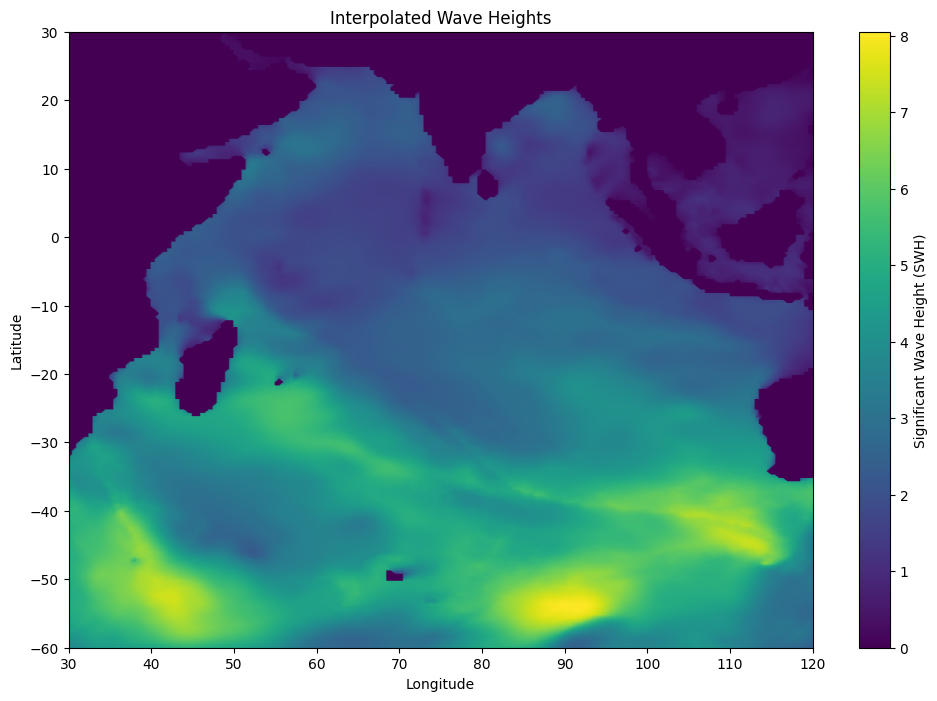

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [3.81992501 3.82133291 3.82274081 ... 2.53992707 2.53610718 2.53228728]
 [3.80038163 3.80178953 3.811038   ... 2.52678911 2.51721588 2.51339599]
 [3.78083825 3.79008672 3.79933519 ... 2.51365114 2.50407791 2.49450469]]
(900, 900)


In [19]:
# Load data
csv_path =  r"wave_data\time_data.csv"
data = pd.read_csv(csv_path)

# Interpolate
grid_lon, grid_lat, interpolated_grid = interpolate_wave_heights(data)
flipped_grid_data = np.flipud(interpolated_grid)

# Plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(grid_lon, grid_lat, 
                      c=interpolated_grid, 
                      cmap='viridis', 
                      s=1)  # smaller point size due to more points
plt.colorbar(scatter, label='Significant Wave Height (SWH)')
plt.title('Interpolated Wave Heights')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(30, 120)
plt.ylim(-60, 30)
plt.show()


print(flipped_grid_data)
print(flipped_grid_data.shape)

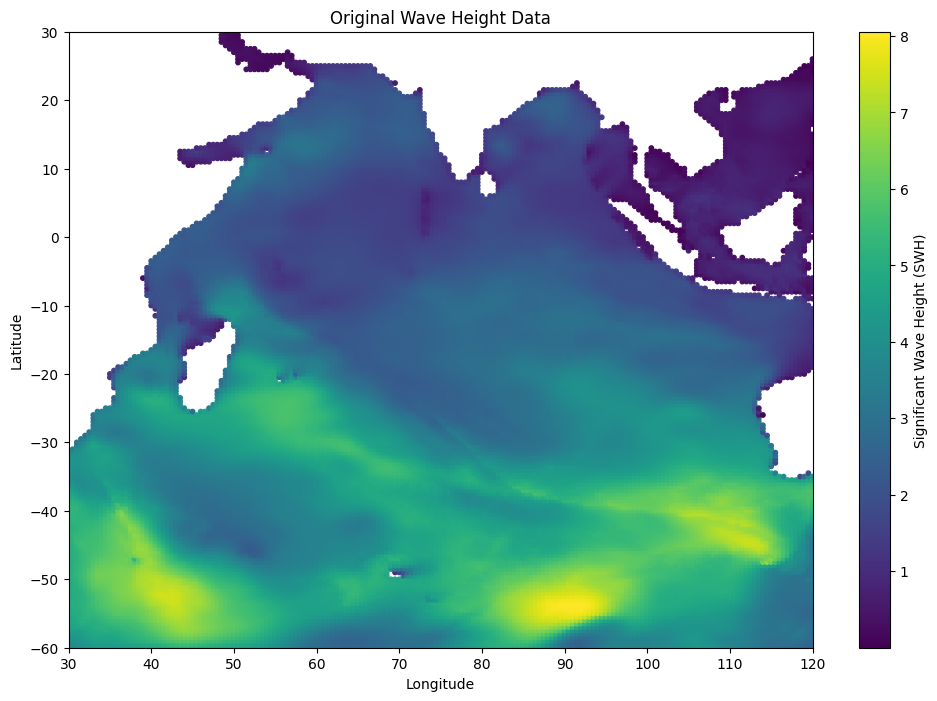

In [20]:
# Load data
data = pd.read_csv(csv_path)

# Create scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(data['LON'], data['LAT'], 
                      c=data['SWH'], 
                      cmap='viridis', 
                      s=10)  # size of points
plt.colorbar(scatter, label='Significant Wave Height (SWH)')
plt.title('Original Wave Height Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(30, 120)
plt.ylim(-60, 30)
plt.show()
    



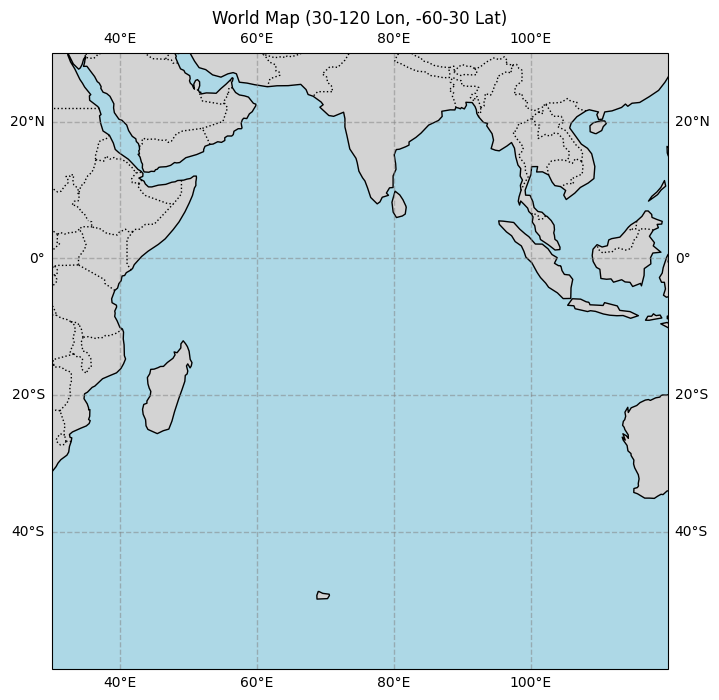

In [21]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def plot_world_map():
    # Create a map projection
    fig, ax = plt.subplots(figsize=(12, 8), 
                            subplot_kw={'projection': ccrs.PlateCarree()})
    
    # Set map extent
    ax.set_extent([30, 120, -60, 30], crs=ccrs.PlateCarree())
    
    # Add map features
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    
    # Add gridlines
    ax.gridlines(draw_labels=True, linewidth=1, color='gray', 
                 alpha=0.5, linestyle='--')
    
    plt.title('World Map (30-120 Lon, -60-30 Lat)')
    plt.show()

# Execute the plot
plot_world_map()

In [22]:
grid_lon_swell, grid_lat_swell, interpolated_grid_swell = interpolate_wave_heights(data,900,'SWELL')

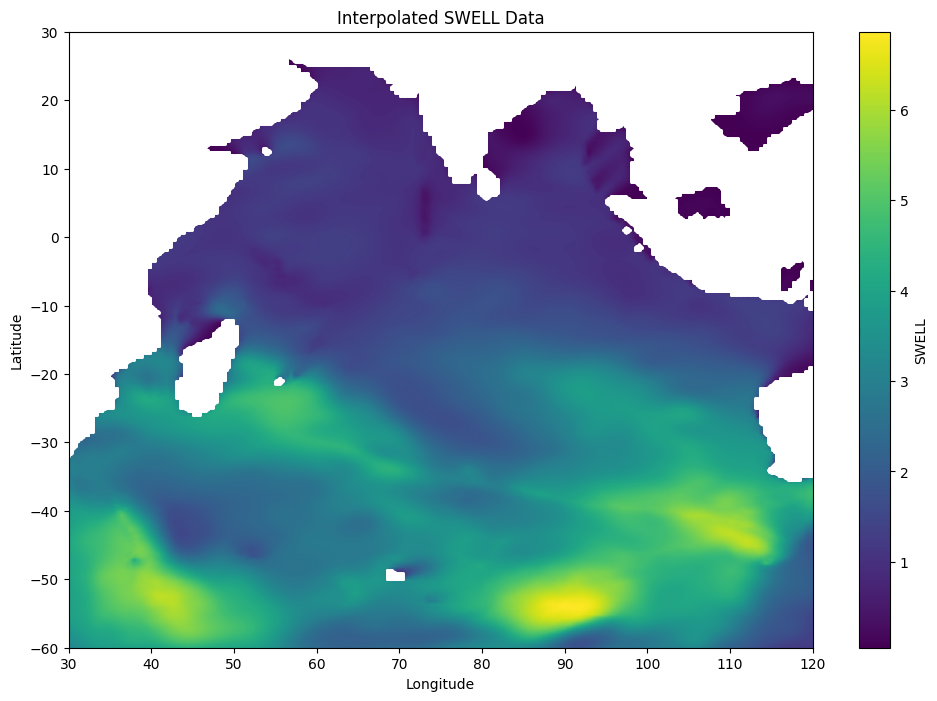

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [3.27811006 3.28089827 3.28368648 ... 1.2368437  1.23854981 1.24025592]
 [3.26753904 3.27032725 3.27557929 ... 1.23213091 1.23177117 1.23347728]
 [3.25696802 3.26222007 3.26747211 ... 1.22741813 1.22705838 1.22669864]]
(900, 900)


In [26]:
flipped_grid_data = np.flipud(interpolated_grid_swell)

# Mask for zero values
zero_mask = (interpolated_grid_swell == 0)

# Create a figure
plt.figure(figsize=(12, 8))

# Plot the main scatter plot with non-zero values
scatter = plt.scatter(
    grid_lon[~zero_mask], 
    grid_lat[~zero_mask], 
    c=interpolated_grid_swell[~zero_mask], 
    cmap='viridis', 
    s=1  # smaller point size due to more points
)

# Add a scatter plot for zero values in white
plt.scatter(
    grid_lon[zero_mask], 
    grid_lat[zero_mask], 
    c='white', 
    s=1  # smaller point size
)

# Add colorbar and labels
plt.colorbar(scatter, label='SWELL')
plt.title('Interpolated SWELL Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(30, 120)
plt.ylim(-60, 30)

# Show the plot
plt.show()

# Check flipped grid data and its shape
print(flipped_grid_data)
print(flipped_grid_data.shape)


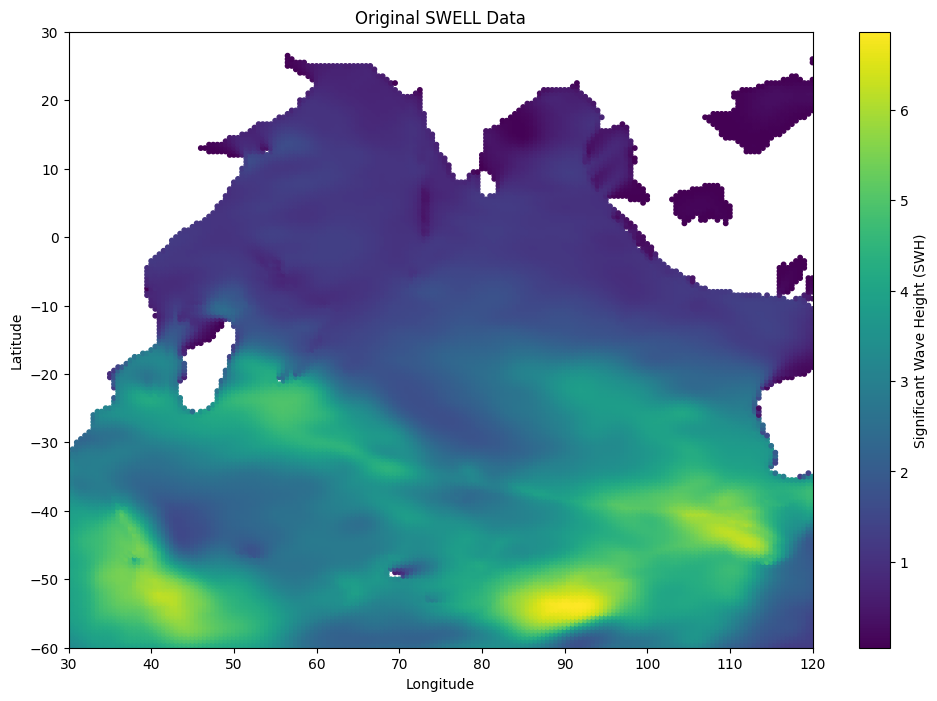

In [24]:
# Load data
data = pd.read_csv(csv_path)

# Create scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(data['LON'], data['LAT'], 
                      c=data['SWELL'], 
                      cmap='viridis', 
                      s=10)  # size of points
plt.colorbar(scatter, label='Significant Wave Height (SWH)')
plt.title('Original SWELL Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(30, 120)
plt.ylim(-60, 30)
plt.show()

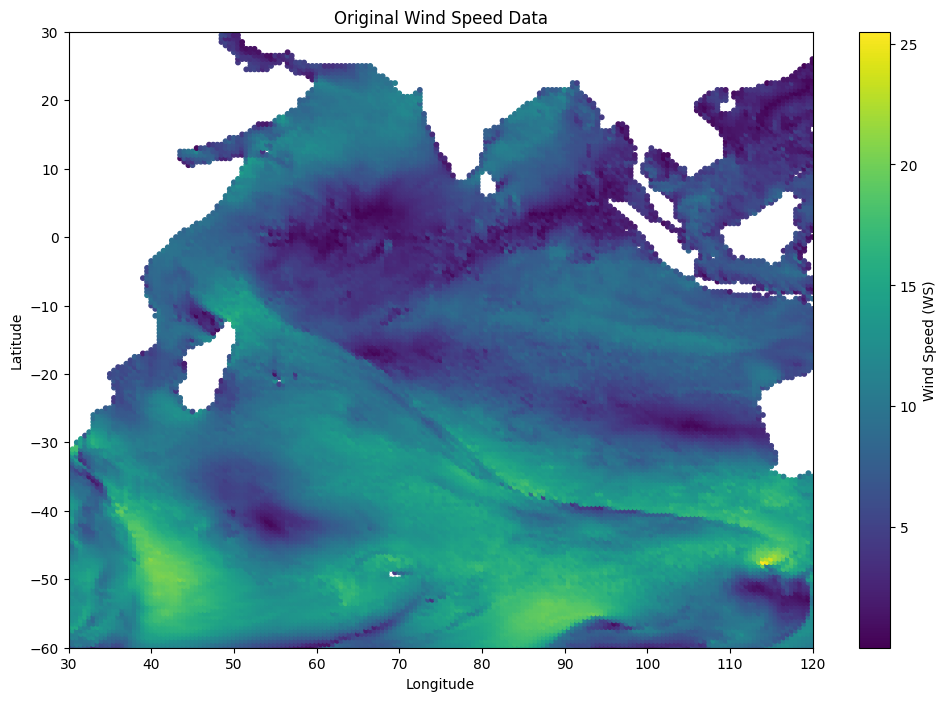

In [25]:
# Load data
import pandas as pd
csv_path = r"wave_data\time_data.csv"
data = pd.read_csv(csv_path)

# Create scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(data['LON'], data['LAT'], 
                      c=data['WS'], 
                      cmap='viridis', 
                      s=10)  # size of points
plt.colorbar(scatter, label='Wind Speed (WS)')
plt.title('Original Wind Speed Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(30, 120)
plt.ylim(-60, 30)
plt.show()

In [18]:
max_ws = data['WS'].max()
print(f"Maximum Wind Speed (WS): {max_ws}")

Maximum Wind Speed (WS): 25.487326735749505
